In [2]:
# X Linear Regression (In-Depth)

# Die einfachste Form der Regression ist die lineare Regression mit einem Prädiktor, bei der die UV versucht die AV mit Hilfe
# der optimalen Gerade vorherzusagen
# >> Dieses einfache Modell kann jedoch erweitert werden, um komplexere Zusammenhänge darzustellen

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Modell-Parameter
Unstd. Regr.koeffizient: 2.027208810360695
Modell Intercept: -4.998577085553202


X Multiple lineare Reggression - Parameter
0.5
[ 1.5 -2.   1. ]


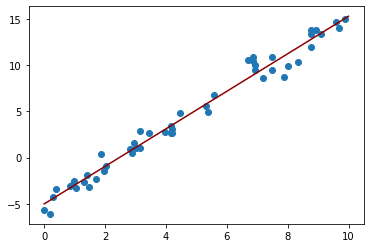

In [3]:
# X 1 Einfache lineare Regression

# Im einfachsten Regressionsmodell werden die Daten mithilfe einer Geraden y = ax + b vorhergesagt
# a entspricht der Steigung und b dem y-Achsenschnitt der Geraden (auch Intercept)

# Erstellen von Daten, die auf einer Gerade liegen
rng = np.random.RandomState(1)
x = 10*rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
# Gerade hat die Form y = 2x - 5 + e(Zufallsfehler)

plt.scatter(x, y)

# Regressionsmodell
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.plot(xfit, yfit, c = "darkred")

# Model_fit Parameter
print("Modell-Parameter")
print(f"Unstd. Regr.koeffizient: {model.coef_[0]}")
print(f"Modell Intercept: {model.intercept_}")
# >> zum erstellen der besten Geraden


# Dieses lineare Modell kann weiter verallgemeinert werden, indem mehrere Prädiktoren für die Vorhersage verwendet werden
# Gleichung: y = a0 + a1x1 + a2x2 ... etc.
# >> dies entspricht dann der Vorhersage der besten Ebene für zwei Prädiktoren ... und einer Hyperplane für mehr als zwei Prädiktoren

rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3) # Datensätz aus 3 Prädiktorvariablen
y = 0.5 + np.dot(X, [1.5, -2., 1.])  # Künstlich erstellt AV
# np.dot wird für Matrixmultiplikation verwendet
#>> entspricht X1 * a1 (1.5) + X2 * a2 (-2) + X3 * a3 (1.)
model.fit(X, y)
print("\n\nX Multiple lineare Reggression - Parameter")
print(np.round(model.intercept_, 1))
print(model.coef_)

[2 3 4]
[[ 2.  4.  8.]
 [ 3.  9. 27.]
 [ 4. 16. 64.]]


array([ 0.00000000e+00,  3.31250194e-01,  1.28845778e+00, -1.06474496e+00,
        2.90659230e-01, -3.57011703e-02,  2.01614685e-03, -4.20513337e-05])

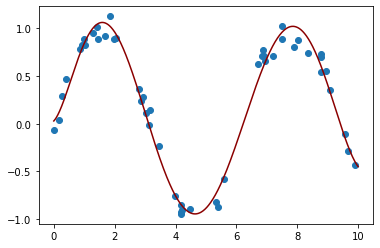

In [13]:
# X 2 Basic Function Regression

# Die Regression kann weiter verallgemeinert werden, indem bei einem multidimensionalen Modell mit y = a0 + a1x1 + a2x2 ...
# x1, x2, x3 von dem eindimensionalen Input x abgeleitet werden
# >> dafür wird xn  als Ergebnis einer Funktion fn(x) berechnet, wie zB. x2 = x*x, wodurch ein quadratisches Messmodell 
#    berechnet werden kann

# - Polynomische Basisfunktion
from sklearn.preprocessing import PolynomialFeatures

x = np.array([2, 3, 4])
print(x)
poly = PolynomialFeatures(3, include_bias=False)
print(poly.fit_transform(x[:, None]))

# PolynomialFeatures macht aus einem eindimensionalen Array, einen Multidimensionalen über die Potenz der Daten
# (heißt, berechnet x, x² und x³, wie in PolynomialFeatures angegeben (3te Potenz))

from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                          LinearRegression())

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1*rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])


plt.scatter(x, y)
plt.plot(xfit, yfit, c ='darkred')


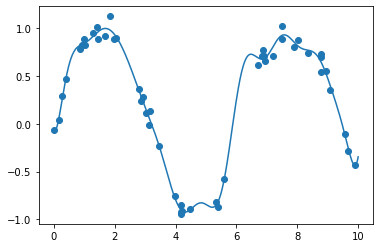

In [16]:
# X 3 Gaussische Basisfunktion
# Es ist möglich ein Modell auf Basis der Summe von Gaussischen Verteilungen zu erstellen, statt auf Basis der Polynomsumme
# >> laut eigener Recherche, geht die Gaussische Process Regression davon aus, dass der Datensatz nicht mit einer einzelnen
#    (linearen) Funktion beschrieben werden kann, sondern von vielen Funktionen, die auf einer Normalverteilung basieren
# >> Daher werden die Datenpunkte in Teile zerlegt, die dann mit einer optimalen Funktion (Normalverteilung mit M und Var) 
#    bestimmt werden können


# In Scikit-Learn gibt es keinen Transformer, der diese Arbeit übernimmt... aber es kann einer erstellt werden

from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    '''Uniformly spaced Guassian features for one-dimensional input'''
    
    def __init__ (self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
        
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        args = (x-y)/ width
        return np.exp(-0.5 * np.sum(args**2, axis))
    
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20),
                           LinearRegression())

gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

# mit gauss_model.steps[0][1] bzw. [1][1] kann auf die Zwischenergebnisse der Pipeline zugegriffen werden
# gauss_model.steps[1][1].coef_ # zeigt die coeffizienten, die berechnet wurden


In [15]:
# Versuch herauszufinden, was bei der Gaussischen Transformation passiert

test = np.array([1, 2, 3]) # Anzahl von Werten erzeugt weiteren Array im Array...

test_model = GaussianFeatures(10) # Weite hier bestimmt, wie viele Werte pro X berechnet werden
test_model.fit_transform(test[:, np.newaxis])


array([[1.00000000e+00, 8.82496903e-01, 6.06530660e-01, 3.24652467e-01,
        1.35335283e-01, 4.39369336e-02, 1.11089965e-02, 2.18749112e-03,
        3.35462628e-04, 4.00652974e-05],
       [7.95595087e-02, 2.16265167e-01, 4.57833362e-01, 7.54839602e-01,
        9.69233234e-01, 9.69233234e-01, 7.54839602e-01, 4.57833362e-01,
        2.16265167e-01, 7.95595087e-02],
       [4.00652974e-05, 3.35462628e-04, 2.18749112e-03, 1.11089965e-02,
        4.39369336e-02, 1.35335283e-01, 3.24652467e-01, 6.06530660e-01,
        8.82496903e-01, 1.00000000e+00]])

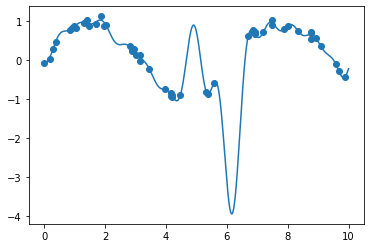

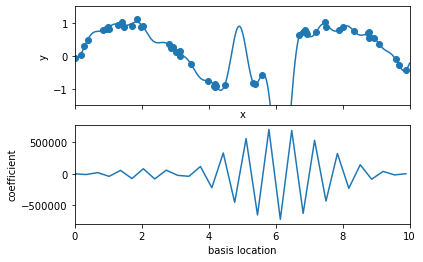

In [7]:
# X Regularization
# Die Verallgemeinerung des Regressionsmodells macht dieses viel flexibler in der Anwendung
# >> Allerdings wird dadurch auch das Problem von overfitting prävalenter

model = make_pipeline(GaussianFeatures(30), 
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))
# Graph zeigt totales overfitting, da kurven an den Stellen eingebaut werden, die weniger von Daten beschränkt sind

def basis_plot(model, title=None):
    fig, ax = plt. subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)
    
    ax[1].plot(model.steps[0][1].centers_,
              model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
             ylabel='coefficient',
             xlim=(0, 10))
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

# Der untere Plot zeigt ein typisches overfitting Verhalten, bei dem die Koeffizienten nebeneinanderliegender Basisfunktion
# (Verfahren der GPR) extrem groß werden und sich gegenseitig ausgleichen >> Ausschläge in der Mitte des Schaubildes
# >> Dieses Verhalten ist Problematisch und soll reguliert werden, indem große Regressionskoeffizienten panalized werden
# >> Das ist Regularization

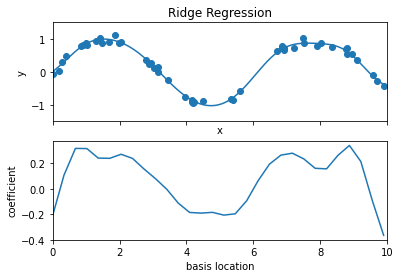

In [32]:
# X Ridge Regression (L2 regularization)
# ist die gängigste Form der Regularization (manchmal auch Tikhonov regularization genannt)
# >> Dabei werden die sum of squares (2-norms) der model coeffizienten penalized (Penalization-Funktion)

# Der freie Parameter Alpha
# ... bestimmt die Stärke der 'Strafe' 
#  >> geht alpha gegen 0 wird das Original-Modell ohne Strafe berechnet
#  >> geht alpha gegen inf wird jeder Modell-Schwankung unterdrückt

from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')


C:\Users\Manue\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e-03, tolerance: 2.065e-03
  model = cd_fast.enet_coordinate_descent(


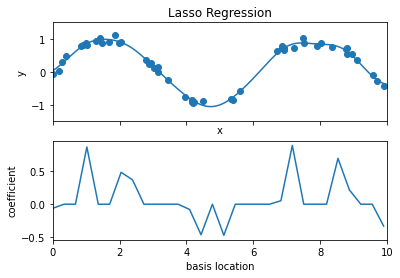

In [42]:
# X Lasso regularization (L1)
# ... ist eine Form der regularization, bei der die absolute Summe der Werte (1-norms) der Regressionskoeffizienten 
#     mit einer Strafe versehen wird 
#  >> Dadurch favorisiert Lasso regularization kleine Modelle (da so viele Parameter wie möglich auf 0 gesetzt werden)

from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=.001))
basis_plot(model, title = "Lasso Regression")

In [123]:
# Beispiel: Vorhersage von Fahrradverkehr
# Versuch Fahrradtrips von über die Fermont Brücke in Seattle vorherzusagen
# Basierend auf Wetter, Jahreszeit etc.

# Dazu wird ein Time-Series Set über Fahrradfahren mit Wetter-Daten des NOAA kombiniert

# 1) Datensätze laden
import pandas as pd
counts = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv("SeattleWeather.csv", index_col='DATE', parse_dates=True)


In [124]:
print('X Bike-Data')
print(counts.head())
print("\nX Weather Data")
print(weather.head())

X Bike-Data
                     Fremont Bridge Total  Fremont Bridge East Sidewalk  \
Date                                                                      
2019-11-01 00:00:00                  12.0                           7.0   
2019-11-01 01:00:00                   7.0                           0.0   
2019-11-01 02:00:00                   1.0                           0.0   
2019-11-01 03:00:00                   6.0                           6.0   
2019-11-01 04:00:00                   6.0                           5.0   

                     Fremont Bridge West Sidewalk  
Date                                               
2019-11-01 00:00:00                           5.0  
2019-11-01 01:00:00                           7.0  
2019-11-01 02:00:00                           1.0  
2019-11-01 03:00:00                           0.0  
2019-11-01 04:00:00                           1.0  

X Weather Data
                STATION                           NAME   AWND  FMTM  PGTM  \
DATE 

X Snippit aus dem aggregierten Datensatz
             Total
Date              
2012-10-03  7042.0
2012-10-04  6950.0
2012-10-05  6296.0
2012-10-06  4012.0
2012-10-07  4284.0


X Erweiterung um Wochentage
             Total  Mon  Tue  Wed  Thu  Fri  Sat  Sun
Date                                                 
2012-10-03  7042.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
2012-10-04  6950.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
2012-10-05  6296.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
2012-10-06  4012.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
2012-10-07  4284.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0

X Erweiterung um Feiertage
             Total  Mon  Tue  Wed  Thu  Fri  Sat  Sun  holiday
Date                                                          
2012-10-08  7074.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0      1.0
2012-11-12  3262.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0      1.0
2012-11-22  1108.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0      1.0
2012-12-25   196.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0      1.0
2013-01-01  

C:\Users\Manue\AppData\Local\Temp\ipykernel_4268\216192991.py:40: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  days = (date - pd.datetime(2000, 12, 21)).days


<AxesSubplot:xlabel='Date'>

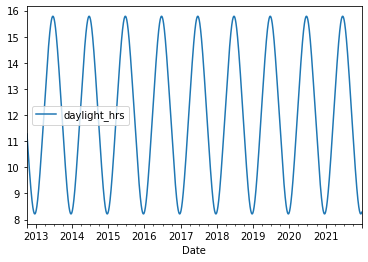

In [171]:
# X Datenaufbereitung
# a) Nun wird der Total Bike-Traffic berechent
daily = counts.resample('d').sum()

# Wird im Buch so gemacht, macht aber eigentlich keinen Sinn, da die Fährräder dann doppelt gezäglt werden
# daily['Total'] = daily.sum(axis=1)
# print(daily.head())
daily = daily.iloc[:,:1]
daily.rename(columns={"Fremont Bridge Total": "Total"}, inplace =True)

print('X Snippit aus dem aggregierten Datensatz')
print(daily.head())


# b) Es werden binary-Spalten für den Tag der Woche ergänzt
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

print('\n\nX Erweiterung um Wochentage')
print(daily.head())


# c) Feiertage werden berücksichtigt
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016') # erstellt Liste aus Daten, an denen US-Feiertage sind
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

print("\nX Erweiterung um Feiertage")
print(daily[daily['holiday'] == 1].head()) # wählt konkret Feiertage aus

# d) Tageslicht wird ergänzt
# (Datetime Class wird in zukunft entfernt und durch Datetime Modul ersetzt)

# seltsame geographische Formel zur Berechnung der Tageszeit in Abhängigkeit von Längen-, Breitengrad und Tag
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
        * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi /365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
print("\nX Erweiterung um Tageslicht")
print(daily.head())
daily[['daylight_hrs']].plot()


In [172]:
# e) durchschnittliche Temperatur und Regen ergänzen (in cm, und binär als trockener/nasser Tag)
# Die Temperatur ist in Fahrenheit statt in Celsius angegeben, in C umwandeln
print(weather[["TMIN", "TMAX"]].iloc[200:400,])

weather['Tmin'] = (weather['TMIN']-32)*5/9
weather['Tmax'] = (weather['TMAX']-32)*5/9

weather['Temp (C)'] = np.round(0.5*(weather['Tmin'] + weather['Tmax']),2)

# Temperatur in 1/10mm angegeben, in inches umwandeln
weather['PRCP'] /= 254
weather['PRCP'].fillna(0, inplace=True)
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])
print(daily.head())


# f) Füge einen Counter hinzu von Tag eins, um zu messen, wieviele Jahre vergangen sind (zeigt annual increase/decrease)
daily['annual'] = (daily.index - daily.index[0]).days / 365

print('\nX Erweiterung um annual Marker')
print(daily.head())


# g) Selbstausgedacht - Marker für Covid-Pandemie ergänzen
daily['covid'] = (daily.index.year >= 2020).astype(int)

            TMIN  TMAX
DATE                  
2012-07-19    58    77
2012-07-20    57    67
2012-07-21    57    75
2012-07-22    54    69
2012-07-23    52    66
...          ...   ...
2013-01-30    44    48
2013-01-31    45    49
2013-02-01    41    53
2013-02-02    37    43
2013-02-03    37    48

[200 rows x 2 columns]
             Total  Mon  Tue  Wed  Thu  Fri  Sat  Sun  holiday  daylight_hrs  \
Date                                                                           
2012-10-03  7042.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0      0.0     11.277359   
2012-10-04  6950.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0      0.0     11.219142   
2012-10-05  6296.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0      0.0     11.161038   
2012-10-06  4012.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0      0.0     11.103056   
2012-10-07  4284.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0      0.0     11.045208   

            PRCP  Temp (C)  dry day  
Date                                 
2012-10-03   0.0     13.33        1  
20

              effect  error
Mon           1078.0  140.0
Tue           1402.0  145.0
Wed           1402.0  140.0
Thu           1145.0  140.0
Fri            606.0  140.0
Sat          -1633.0  142.0
Sun          -1773.0  142.0
holiday      -2118.0  293.0
daylight_hrs   214.0   15.0
PRCP            -0.0    0.0
Temp (C)       120.0    7.0
dry day       1186.0   52.0
annual         136.0   13.0
covid        -3760.0  112.0


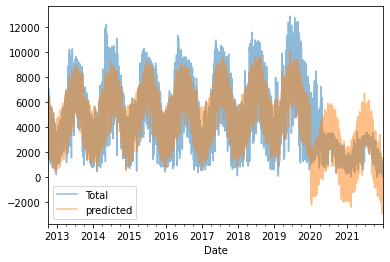

In [177]:
# X Lineare Regression
# Datensatz mit Prädiktorvariablen und Vorhersagewert erstellen
column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
       'daylight_hrs', 'PRCP', 'Temp (C)', 'dry day', 'annual', 'covid']
X = daily[column_names]
y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

daily[['Total', 'predicted']].plot(alpha=0.5)

# Blick auf die Coeffizienten
params = pd.Series(model.coef_, index=X.columns)
# print(params)

# Berechnet standardabweichung der Koeffizienten mit einem Bootstrap
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_
             for i in range(1000)], 0)

print(pd.DataFrame({'effect' : params.round(0),
                   'error': err.round(0)}))